In [1]:
import pandas as pd 
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
import statsmodels.api as sm

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = 12,8

In [2]:
# read in data - data in same folder as notebook

movies = pd.read_csv('movies.csv')
movies.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [3]:
# data cleaning - #get percent missing in each column

# na_index = [] #get index of NA per column
na_per = [] 

for col in movies.columns:
    # na_index.append(np.where(movies[col].isna()))
    col_per = round(np.mean(movies[col].isna()) * 100, 2)
    print(f'{col} : {col_per} %')
    na_per.append(col_per)
    

name : 0.0 %
rating : 1.0 %
genre : 0.0 %
year : 0.0 %
released : 0.03 %
score : 0.04 %
votes : 0.04 %
director : 0.0 %
writer : 0.04 %
star : 0.01 %
country : 0.04 %
budget : 28.31 %
gross : 2.46 %
company : 0.22 %
runtime : 0.05 %


In [4]:
movies[['year', 'released']][240:250] #noticed some years dont match released like 248, google says released is correct

,year,released
240,1982,"July 23, 1982 (United States)"
241,1982,"May 21, 1982 (United States)"
242,1982,"July 23, 1982 (United States)"
243,1982,"February 18, 1983 (United States)"
244,1982,"July 30, 1982 (United States)"
245,1982,"July 16, 1982 (United States)"
246,1982,"March 19, 1982 (United States)"
247,1982,"November 19, 1982 (United States)"
248,1982,"February 4, 1983 (United States)"
249,1982,"December 10, 1982 (United States)"


In [5]:
"""
Take the year from the released date rather than using year.
"""

para_index = movies['released'].astype(str).str.find('(')
year_indstart = para_index - 5
year_indend = para_index - 1

years_corrected = [] 
for i, date in enumerate(movies['released'].sort_index()):
    if isinstance(movies['released'][i],str):
        years_corrected.append(int(movies['released'][i][year_indstart[i]:year_indend[i]]))
    else:
        years_corrected.append(0)

movies['year'] = years_corrected
movies['net'] = movies['gross'] - movies['budget']

In [6]:
movies.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,net
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0,27998772.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0,54353106.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0,520375067.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0,79953539.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0,33846344.0


In [7]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

"""
Use sklearn's iterativeimputer module to input missing budget columns using the other features. This feature is experimental but may yield more accurate results since the estimated budget is based from multiple features.
"""

movies_num = movies[['year','score','budget','gross','runtime','net']]
movies_full = movies_num[movies_num['budget'].notna()]

movies_empty = movies_num[movies_num['budget'].isna()]

imp = IterativeImputer(max_iter=10, random_state=0)
imp.fit(movies_num)

movies_imputed = pd.DataFrame(np.round(imp.transform(movies_num),1), columns= movies_empty.columns)
movies_imputed.year = movies_imputed['year'].astype(int)

movies.reset_index(drop=True)
movies = movies.drop(['year','score','budget','gross','runtime','net'], axis=1)
movies = movies.merge(movies_imputed, left_index=True, right_index=True)


In [48]:
movies[movies.year == 0]

# only 2 instances of 0 year - can change manually

movies.loc[5728,'year'] = 2010
movies.loc[5730,'year'] = 2010

Begin with some exploratory analysis to get a sense of the dataset. 

We can conduct the following:

* Votes vs Budget, Director, Actor, Net profit
* Frequency of movie releases by year, actor, director
* Plot of net profit vs budget
* Frequency of movie by Genre

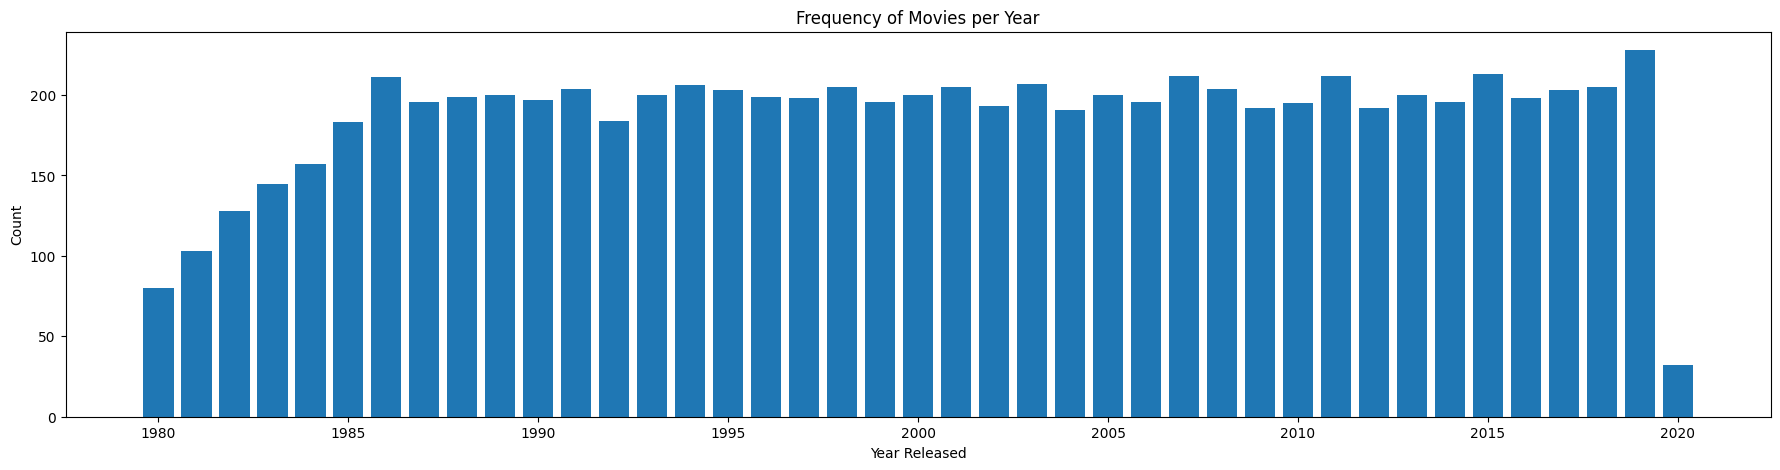

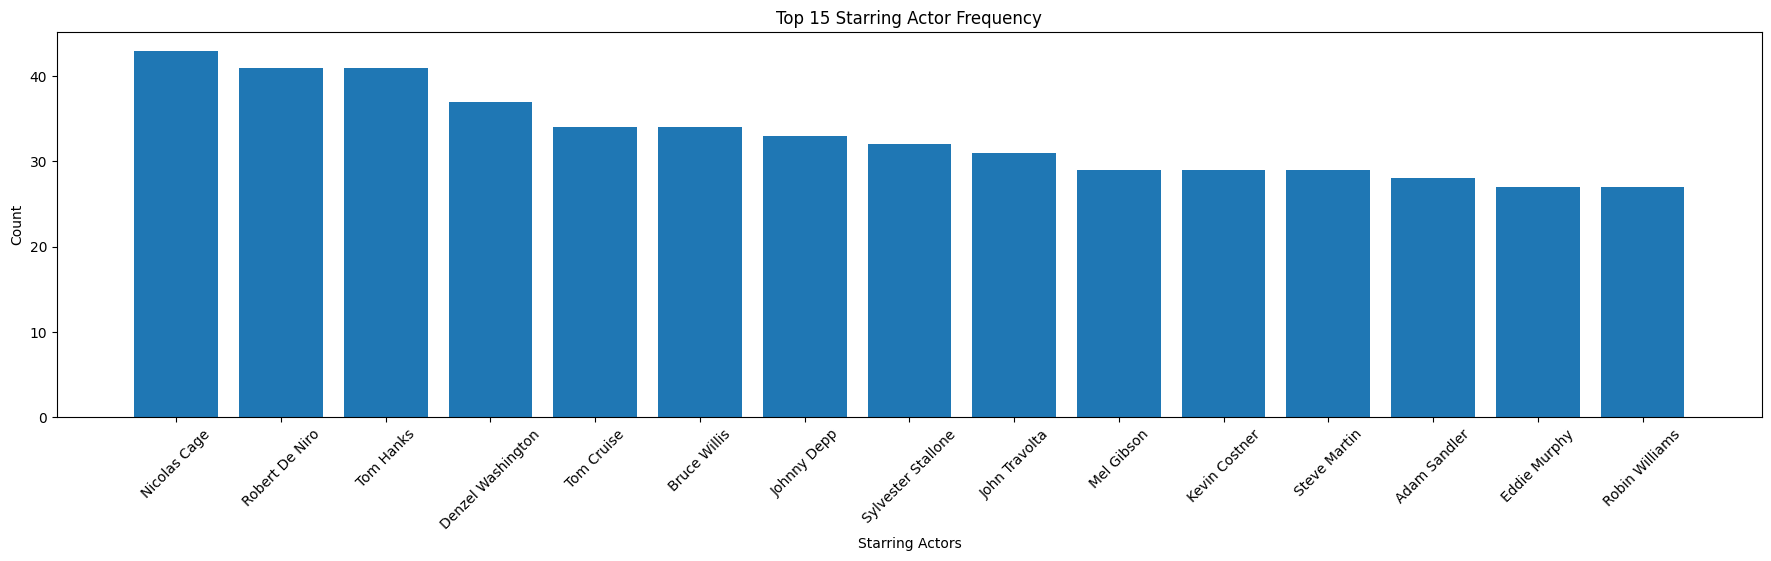

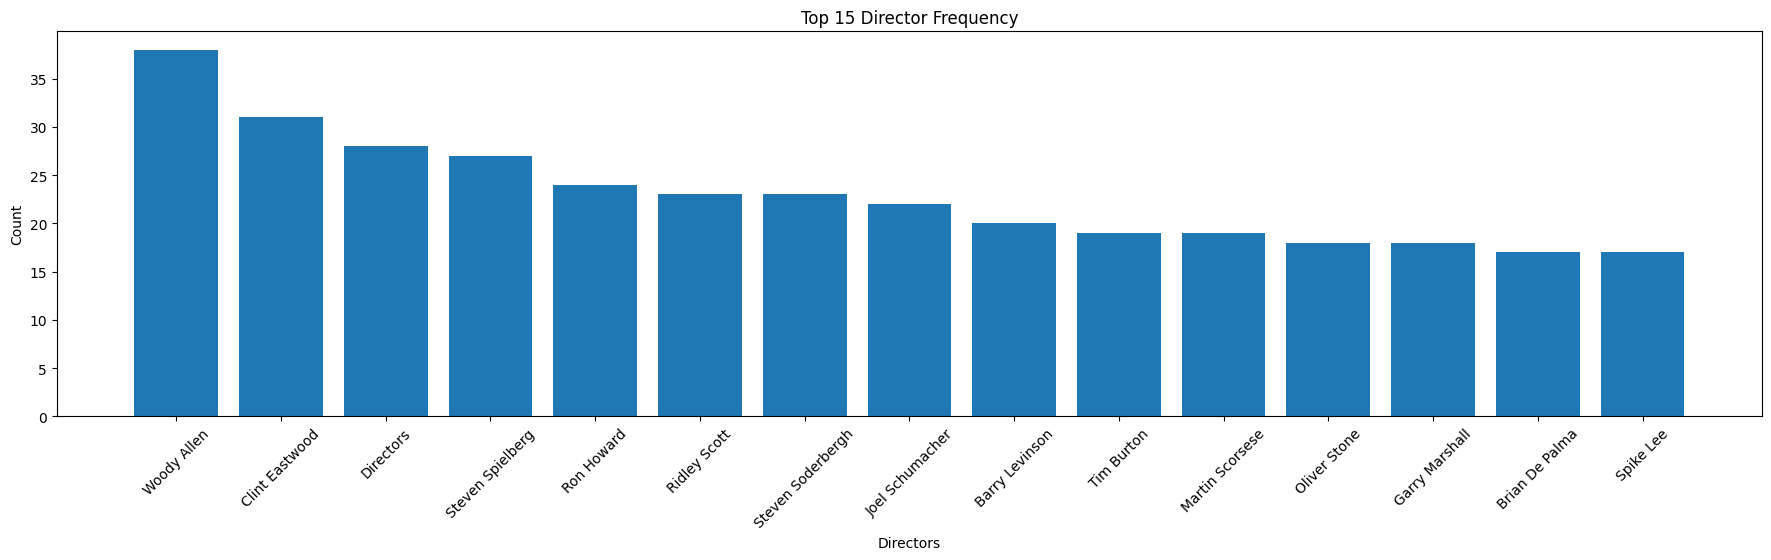

In [106]:
"""
Frequency of movie releases by years, actors, directors

Data scraped before end of 2020, there will likely be much more data from 2020
"""

# find top 15 actors 
top_stars = movies.star.value_counts()[:15]
# top 15 directors
top_directors = movies.director.value_counts()[:15]

plt.figure(figsize=(22,5))
plt.bar(movies.year.value_counts().index, movies.year.value_counts())
plt.title('Frequency of Movies per Year')
plt.xlabel('Year Released')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(22,5))
plt.bar(top_stars.index, top_stars)
plt.xticks(range(len(top_stars.index)), top_stars.index, rotation=45)
plt.title('Top 15 Starring Actor Frequency')
plt.xlabel('Starring Actors')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(22,5))
plt.bar(top_directors.index, top_directors)
plt.xticks(range(len(top_directors.index)), top_directors.index, rotation=45)
plt.title('Top 15 Director Frequency')
plt.xlabel('Directors')
plt.ylabel('Count')
plt.show()

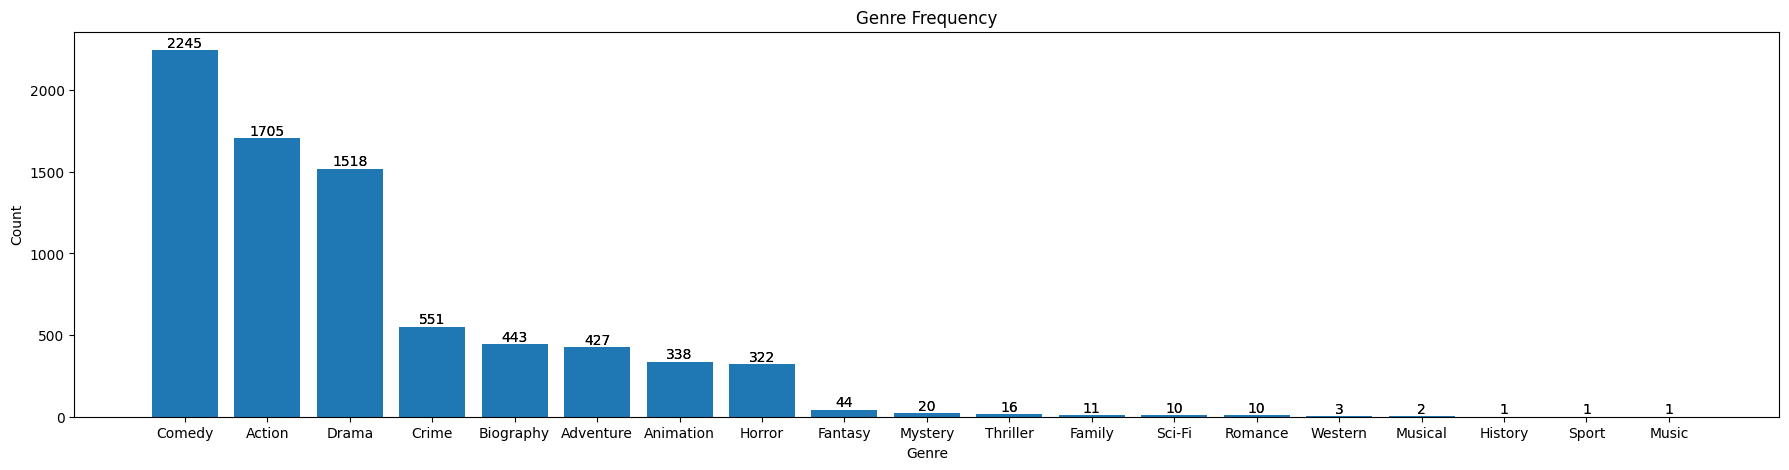

In [117]:
"""
How many movies are in each genre?
"""

fig, ax = plt.subplots(figsize=(22,5))
bars = ax.bar(movies.genre.value_counts().index, movies.genre.value_counts())
ax.bar_label(bars)
plt.title('Genre Frequency')
plt.xlabel('Genre')
plt.ylabel('Count')

for bars in ax.containers:
    ax.bar_label(bars)

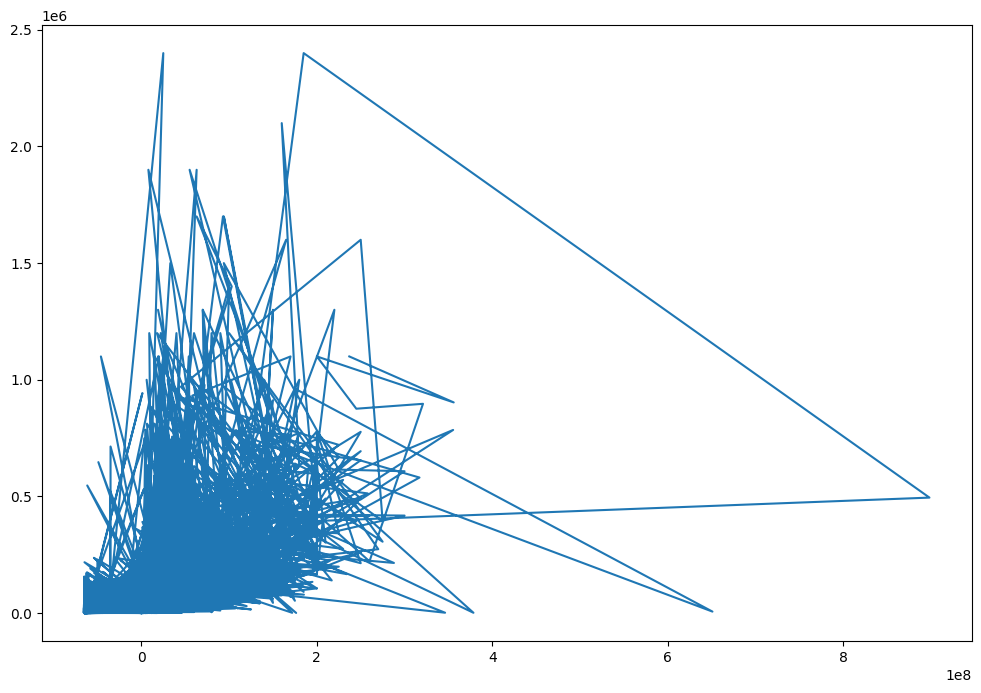

In [119]:
"""
Look at the relationship between votes and other factors, i.e. public sentiment towards movie based on factors. 
Votes vs Budget, Director, Actor, Net profit
"""

plt.plot(movies.budget, movies.votes)

<Axes: xlabel='budget', ylabel='gross'>

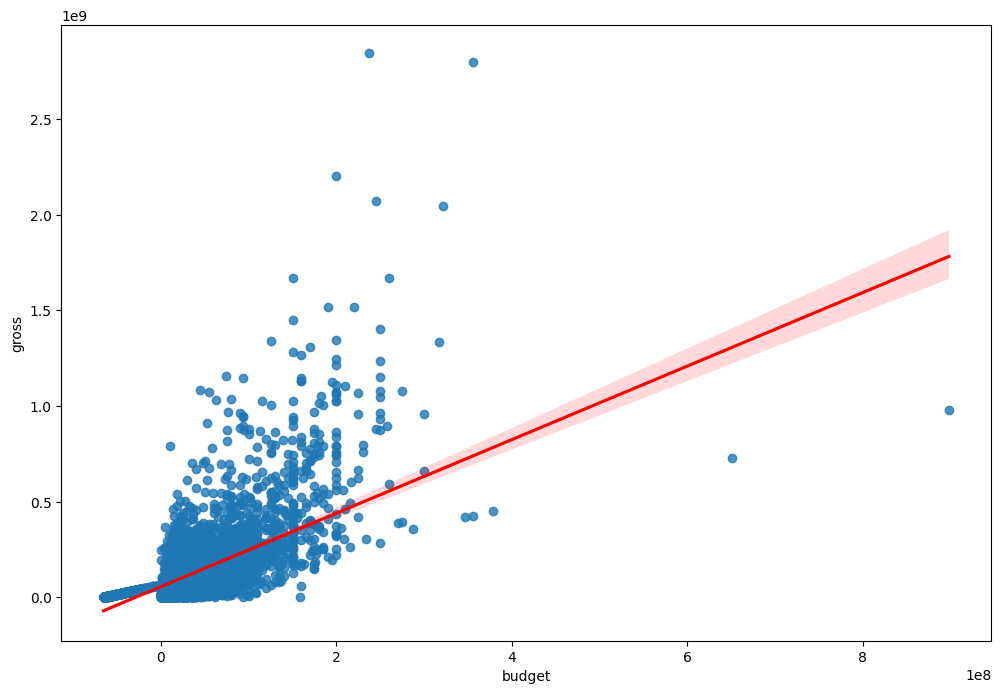

In [10]:
# regression plot
movies.sort_values(by=['gross'], inplace = True, ascending = False)
sns.regplot(x='budget', y='gross', data=movies, line_kws={'color': 'red'})

scatter plot indicates a positive correlation between budget and gross. More money in = more money out in general.

In [11]:
# using numeric features from movies, find correlation matrix

corr_matrix1 = movies[['budget', 'gross', 'net', 'runtime','score','votes','year']].corr()
corr_matrix1

,budget,gross,net,runtime,score,votes,year
budget,1.000000,0.657235,0.385940,0.230048,0.049505,0.453054,0.089488
gross,0.657235,1.000000,0.948946,0.239981,0.183824,0.629352,0.080488
net,0.385940,0.948946,1.000000,0.197459,0.204285,0.580720,0.061066
runtime,0.230048,0.239981,0.197459,1.000000,0.397353,0.306208,0.167496
score,0.049505,0.183824,0.204285,0.397353,1.000000,0.409182,0.045525
votes,0.453054,0.629352,0.580720,0.306208,0.409182,1.000000,0.070314
year,0.089488,0.080488,0.061066,0.167496,0.045525,0.070314,1.000000


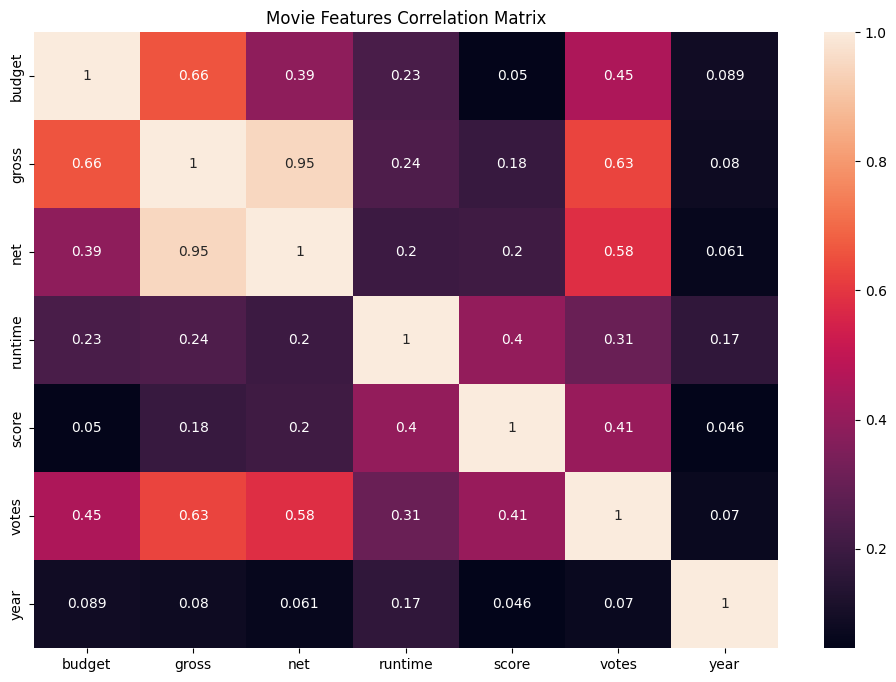

In [12]:
# visualize correlation using heatmap

sns.heatmap(corr_matrix1, annot=True)
plt.title('Movie Features Correlation Matrix')
plt.show()

In [13]:
# assign dummy variables to categorical variables and create dictionary to retrieve original name from dummy variable later

movies_conv = movies.copy()
dummy_dic = {}

for col in movies_conv.columns:
    if movies_conv[col].dtype == 'object':
        movies_conv[col] = movies_conv[col].astype('category')
        # add category to dictionary
        dummy_dic[col] = dict(enumerate(movies_conv[col].cat.categories))
        # convert category to dummy value
        movies_conv[col] = movies_conv[col].cat.codes
        


movies_conv

,name,rating,genre,released,votes,director,writer,star,country,company,year,score,budget,gross,runtime,net
5445,533,5,0,696,1100000.0,1155,1778,2334,55,2253,2009,7.8,237000000.0,2.847246e+09,162.0,2.610246e+09
7445,535,5,0,183,903000.0,162,743,2241,55,1606,2019,8.4,356000000.0,2.797501e+09,181.0,2.441501e+09
3045,6896,5,6,704,1100000.0,1155,1778,1595,55,2253,1997,7.8,200000000.0,2.201647e+09,194.0,2.001647e+09
6663,5144,5,0,698,876000.0,1125,2550,524,55,1540,2015,7.8,245000000.0,2.069522e+09,138.0,1.824522e+09
7244,536,5,0,192,897000.0,162,743,2241,55,1606,2018,8.4,321000000.0,2.048360e+09,149.0,1.727360e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3818,3360,6,4,1119,5200.0,730,1123,2319,54,477,2001,6.5,-65385730.1,1.400000e+03,103.0,6.538713e+07
7625,6720,-1,4,1149,320.0,2546,2565,1915,55,2308,2019,5.7,-65386337.3,7.900000e+02,104.0,6.538713e+07
7580,4664,3,5,1835,735.0,1445,2203,2278,55,1992,2020,5.2,-65386445.3,6.820000e+02,93.0,6.538714e+07
2417,3406,-1,6,85,5100.0,33,1718,2563,27,796,1993,7.3,11900000.0,5.960000e+02,134.0,-1.189940e+07


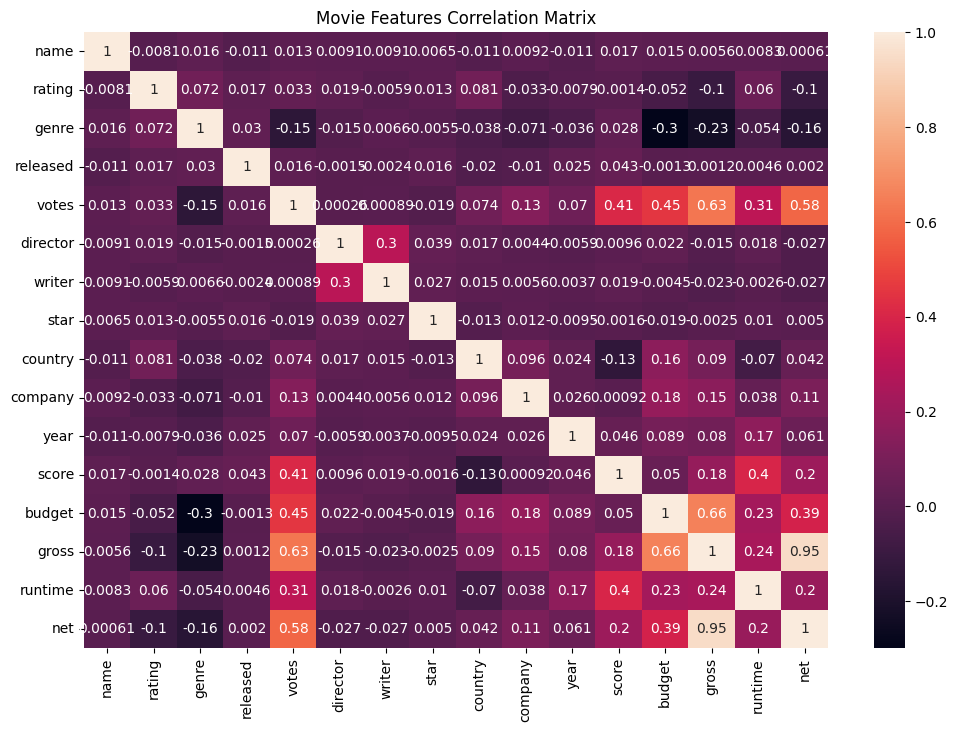

In [14]:
corr_matrix2 = movies_conv.corr()

sns.heatmap(corr_matrix2, annot=True)
plt.title('Movie Features Correlation Matrix')
plt.show()

In [15]:
# find correlation between pairs of features

corr_pairs = corr_matrix2.unstack().sort_values()

high_corr = corr_pairs[corr_pairs >= 0.5]
high_corr = high_corr[high_corr < 1]

high_corr

votes   net       0.580720
net     votes     0.580720
gross   votes     0.629352
votes   gross     0.629352
gross   budget    0.657235
budget  gross     0.657235
gross   net       0.948946
net     gross     0.948946
dtype: float64

From the data, we can see that the highest correlation to net profit are budget, gross profit, and movie votes. We choose to ignore votes and gross since these statistic are post release measure meaning it isn't available during production or shortly before release.

In [16]:
movies_conv.budget.fillna(movies_conv.budget.median(), inplace=True)
movies_conv.gross.fillna(movies_conv.gross.median(), inplace=True)
movies_conv.fillna(0, inplace=True)

movies_conv.isna().any()

name        False
rating      False
genre       False
released    False
votes       False
director    False
writer      False
star        False
country     False
company     False
year        False
score       False
budget      False
gross       False
runtime     False
net         False
dtype: bool

From the correlation matrix, we can see that there are many pairs that is not our focus are correlated too. This will cause issues in our analyses using regression models since no correlation between predictor variables is an assumption for regression models. We can try to remove these multicollinear features using dimensionality reduction techniques like PCA or models that are robust to multicollinearity like Elasticnet Regression.

In [17]:
movies_conv

,name,rating,genre,released,votes,director,writer,star,country,company,year,score,budget,gross,runtime,net
5445,533,5,0,696,1100000.0,1155,1778,2334,55,2253,2009,7.8,237000000.0,2.847246e+09,162.0,2.610246e+09
7445,535,5,0,183,903000.0,162,743,2241,55,1606,2019,8.4,356000000.0,2.797501e+09,181.0,2.441501e+09
3045,6896,5,6,704,1100000.0,1155,1778,1595,55,2253,1997,7.8,200000000.0,2.201647e+09,194.0,2.001647e+09
6663,5144,5,0,698,876000.0,1125,2550,524,55,1540,2015,7.8,245000000.0,2.069522e+09,138.0,1.824522e+09
7244,536,5,0,192,897000.0,162,743,2241,55,1606,2018,8.4,321000000.0,2.048360e+09,149.0,1.727360e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3818,3360,6,4,1119,5200.0,730,1123,2319,54,477,2001,6.5,-65385730.1,1.400000e+03,103.0,6.538713e+07
7625,6720,-1,4,1149,320.0,2546,2565,1915,55,2308,2019,5.7,-65386337.3,7.900000e+02,104.0,6.538713e+07
7580,4664,3,5,1835,735.0,1445,2203,2278,55,1992,2020,5.2,-65386445.3,6.820000e+02,93.0,6.538714e+07
2417,3406,-1,6,85,5100.0,33,1718,2563,27,796,1993,7.3,11900000.0,5.960000e+02,134.0,-1.189940e+07


In [18]:
import sklearn.linear_model as lm
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import numpy as np

In [19]:
# net profit will be our target variable for this exerecise

y_net = movies_conv['net']

movies_features = list(movies_conv.columns)
movies_features.remove('net')

# remove gross, votes, and score since they are post movie release statistics. 
movies_features.remove('gross')
movies_features.remove('votes')
movies_features.remove('score')

X_movies = movies_conv[movies_features]



12 features, reduction of 0.00%


Text(0.5, 0, 'Features')

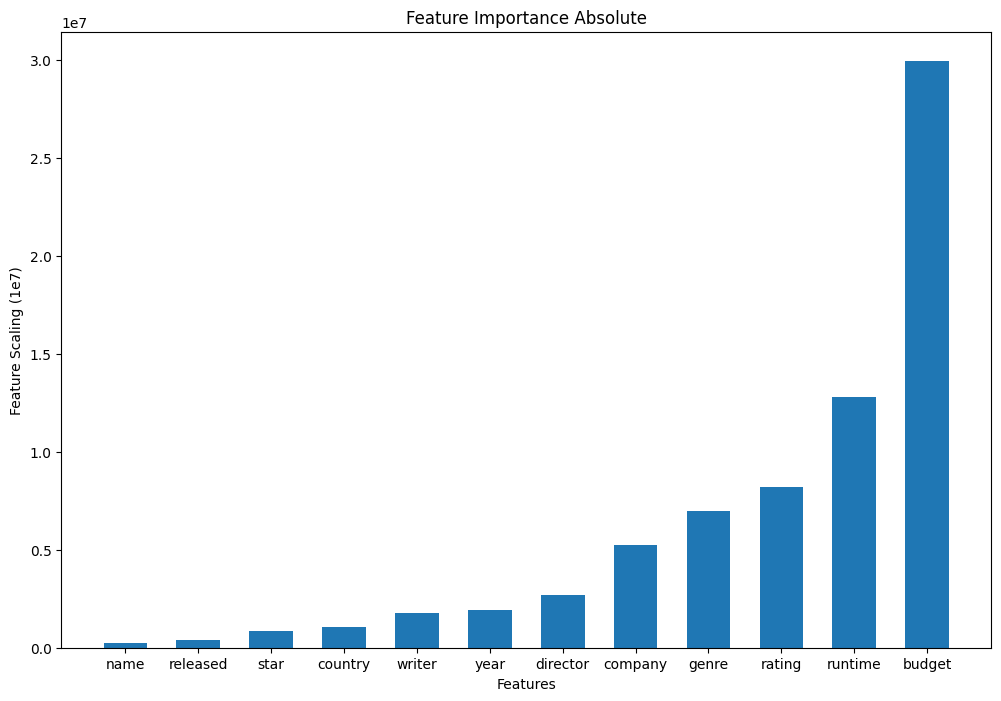

In [20]:
# elastic net requires normalization since penalty coefficients are the same for all variables 

gross_model = make_pipeline(StandardScaler(), lm.ElasticNet(random_state=0))

gross_model.fit(X_movies, y_net)

feature_importance = pd.Series(index = X_movies.columns, data = np.abs(gross_model.steps[1][1].coef_))

n_selected_features = (feature_importance>0).sum()
print('{0:d} features, reduction of {1:2.2f}%'.format(
    n_selected_features,(1-n_selected_features/len(feature_importance))*100))

plt.bar(feature_importance.sort_values().index, feature_importance.sort_values(), width=0.6)
plt.title('Feature Importance Absolute')
plt.ylabel('Feature Scaling (1e7)')
plt.xlabel('Features')

Text(0.5, 0, 'Features')

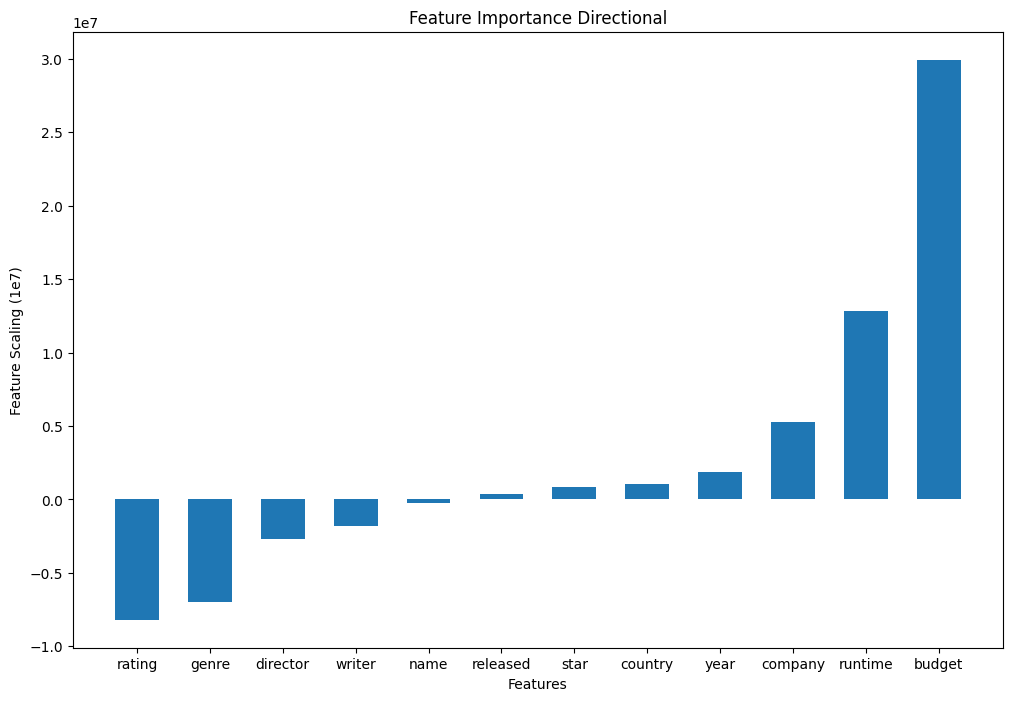

In [21]:
feature_importance_directional = pd.Series(index = X_movies.columns, data = gross_model.steps[1][1].coef_)

plt.bar(feature_importance_directional.sort_values().index, feature_importance_directional.sort_values(), width=0.6)
plt.title('Feature Importance Directional')
plt.ylabel('Feature Scaling (1e7)')
plt.xlabel('Features')

In [22]:
dummy_dic['genre']

{0: 'Action',
 1: 'Adventure',
 2: 'Animation',
 3: 'Biography',
 4: 'Comedy',
 5: 'Crime',
 6: 'Drama',
 7: 'Family',
 8: 'Fantasy',
 9: 'History',
 10: 'Horror',
 11: 'Music',
 12: 'Musical',
 13: 'Mystery',
 14: 'Romance',
 15: 'Sci-Fi',
 16: 'Sport',
 17: 'Thriller',
 18: 'Western'}

In [23]:
dummy_dic['rating']

{0: 'Approved',
 1: 'G',
 2: 'NC-17',
 3: 'Not Rated',
 4: 'PG',
 5: 'PG-13',
 6: 'R',
 7: 'TV-14',
 8: 'TV-MA',
 9: 'TV-PG',
 10: 'Unrated',
 11: 'X'}

Looking at the initial analysis correlation matrix near the top, we can see that Budget and Net has high correlation at 0.74 with all other pre-release statistics being much lower than 0.5. This gives an preliminary understanding that a high budget film will also, more probable than not, return a high net profit. This agrees with logic since the higher budget a movie has, the more effort has gone into it. 

Of course a correlation matrix is not enough to validate our hypohthesis, we continue to perform regression analysis using elastic net regression. The benefit of Elastic net regression is that it combines the advantages of ridge and lasso regression, which penalize the coefficients of the linear model based on their magnitude and sparsity, respectively. We understand the 

In conclusion, when taking only pre-movie release statistics into account, we see that the features did not need to be removed since they're statistically significant enough to be included into the elastic net model but have a miniscule effect in affecting the net income compared to other factors like budget. Regarding the categorical dummy variables, their results may be explainable when considering the assignment of the categories into each numerical value. For example, for genre, action, adventure, fantasy, drama, comedy are likely to be some of the most popular genres when it comes to film. Having them in the lower half of the dummy numerical value assignment likely led the model to assign a negative scaling to that category.

Our most confident conclusion remains budget is highly proportional to net profit meaning the more money a production puts into a film, the higher the film will likely earn. 